## Elements of Structured Data
There are two types of structurd data
* numeric
    * continuos (e.g. time)
    * discrete (e.g. count of occurrence of an event)
* categorical (fixed set of values)
    * binary
    * ordinal (e.g. numerical rating)

## Rectangular Data
* Two dimesional matrix with 
    * rows (records)
    * columns (features)
 
One terminology used within statical and ML is a **Data frame**

## Nonrectangular Data Structures
There are other data structures
* Time series (with a sample rate)
* Spatial data structures (mapping and location analytics)
* Graph (physical, social network, connections between people)

## Estimates of Location (Metric)
Esimations of where most of the data is located
### Mean (Average): 
`The sum of all values divided by the number of values`

$$
Mean = \hat{x} = \sum_{i=1}^n x_i/n
$$


### Trimmed mean: 
`The average of all values after dropping a fixed number of extreme values`

$$
Mean = \hat{x} = \sum_{i=1+p}^{n-p} x_i/n
$$

### Weighted mean:
`The sum of all values times a weight divided by the sum of the weights.`
$$
Mean = \hat{x} = \dfrac{\sum_{i=1+p}^{n-p} w_i*x_i}{\sum_{i=1+p}^{n-p} w_i}
$$
Advantages:
* Some values more variable than other
* The data collected does not equally represent the different groups that we are interested in measuring

### Median: 
`The value such that one-half of the data lies above and below`

Middle number on a sorted list
If we have: $[0, 1, 5, 10, 10000000]$ the median will be $5$

### Weighted median:
`The value such that one-half of the sum of the weights lies above and below the sorted data`

Given 
$$\sum_{i=i}^n = 1$$
The weighted median is the element $x_k$ satisfying
$$
    \sum_{i=1}^{k-1} \leq 0.5
$$
    and 
$$
    \sum_{i=k+1}^{n} \leq 0.5
$$

### Outliers
The median is referred to as a robust estimae of location since it is not influenced by outliers -> **extreme cases**. It could be the case that we are interested on them and we have to apply a **Anomaly detection**

### Example 

In [1]:
import pandas as pd
state = pd.read_csv('state.csv') # This is a data frame
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
state['Population'].mean()

6162876.3

In [3]:
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1) # Drops 10% from each end

4783697.125

In [4]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


If we want to compute murder rate for the country, let's find the weighted mean

In [5]:
import numpy as np
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

Or with wquantile
$ pip install wquantiles

In [6]:
import wquantiles
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

## Estimates of Variability
* Referred to as `dispersion`
* Measure whether the data values are tightly clusterd or spread out

### Mean absolute deviation
`The mean of the absolute values of the deviations from the mean.`
$$
Mean Absolute Deviation = \dfrac{\sum_{i=1}^n |x_i -\bar{x}|}{n}
$$

## Deviations (errors, residuals)
`The difference between the observed values and the esitmate location`

## Variance
`The sume of squared deviations from the meand divided by n-1 where n is the number of data values.`

$$
Variance = s^2 = \dfrac{\sum_{i=1}^n {(x_i -\bar{x})}^2}{n-1}
$$

## Standard deviation
`The square root of the variance`

$$
StandartDeviation=s= \sqrt{variance}
$$

### Median absolute deviation from the median
`The median of the absolute values of the deviations from the median.`
$$
Mean Absolute Deviation = Median(|x_1 -median|,...,|x_1 -median|)
$$

### Range
`The difference between the largest and the smallest value in a data set.`

### Order statistics
`Metrics based on the data values sorted from smallest to biggest.`

### Percentile
`The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.`
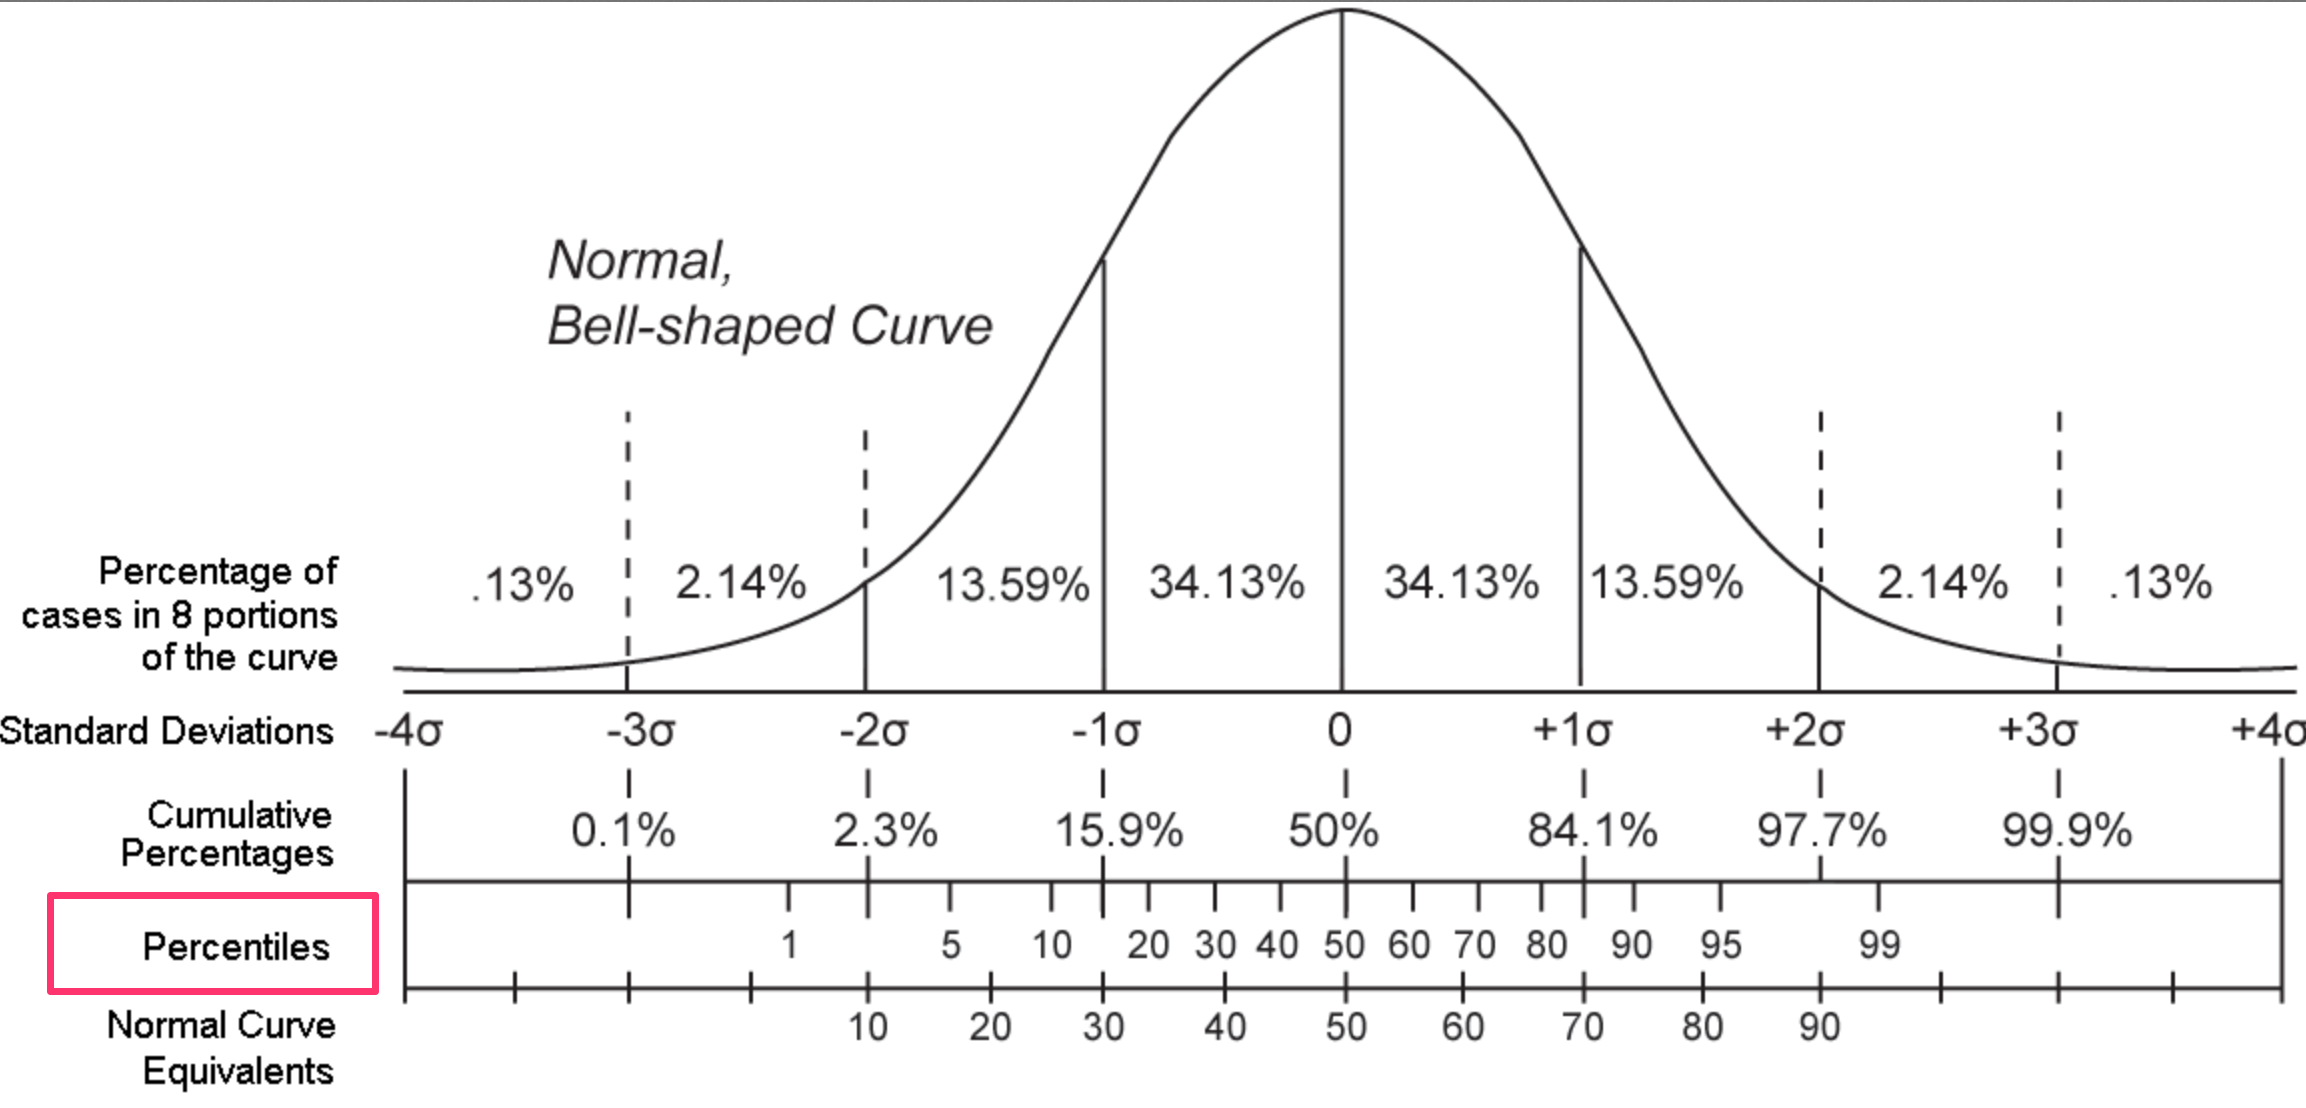

## Example

In [7]:
state['Population'].std()

6848235.347401142

In [8]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)


4847308.0

## Exploring the Data Distribution

### Percentiles and Boxplot
* Percentiles can be used to measure the spread of the data.
* Percentiles are also valuable to summarize the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles).

In [9]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

BoxPlot:  A plot introduced by Tukey as a quick way to visualize the distribution of data. 

Text(0, 0.5, 'Population (millions)')

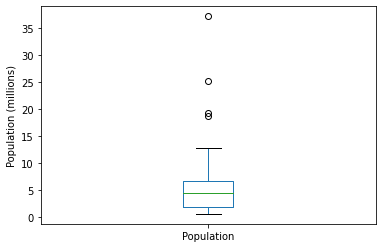

In [10]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

The top and bottom of the box are the 75th and 25th percentiles, respectively.

## Frequency table
A tally of the count of numeric data values that fall into a set of intervals (bins).

In [11]:
binnedPopulation = pd.cut(state['Population'], 10) # segment the population
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

### Histogram
A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis.

Text(0.5, 0, 'Population (millions)')

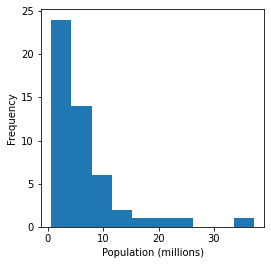

In [12]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

In general, histograms are plotted such that:

* Empty bins are included in the graph.
* Bins are equal width.
* Number of bins (or, equivalently, bin size) is up to the user.
* Bars are contiguous—no empty space shows between bars, unless there is an empty bin.

### STATISTICAL MOMENTS
In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. **Skewness** refers to whether the data is skewed to larger or smaller values and **kurtosis** indicates the propensity of the data to have extreme values. 

### Density plot
A smoothed version of the histogram. A density plot can be thought of as a smoothed histogram.

Text(0.5, 0, 'Murder Rate (per 100,000)')

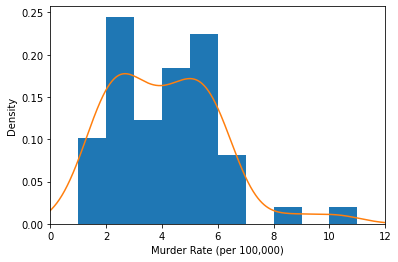

In [13]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Exploring Binary and Categorical Data


The next table shows the percentage of delayed flights by the cause of delay at Dallas/Fort Worth airport since 2010. Delays are categorized as being due to factors under carrier control, air traffic control (ATC) system delays, weather, security, or a late inbound aircraft.

In [14]:
dfw = pd.read_csv('dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


### Bar charts
The frequency or proportion for each category plotted as bars.

Text(0, 0.5, 'Count')

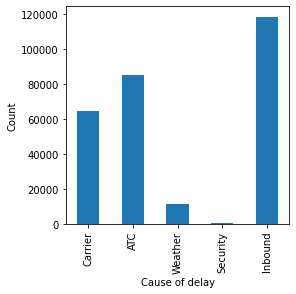

In [15]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

### Mode
The most commonly occurring category or value in a data set.

### Expected value
When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.

The expected value is calcuated as follows
1. Multiply each outcome by its propability of occurring
2. Sum these values

Example 

 A marketer for a new cloud technology offers two levels of service, 
* one priced at \$300/month
* another at \$50/month. 

The marketer offers free webinars to generate leads, and the firm figures that:
* 5% of the attendees will sign up for the $300 service
* 15% for the $50 service
* and 80% will not sign up for anything. 

The expected value of a webinar attendee would be:

$$
EV = (0.05)(300) + (0.015)(50) + (0.80)(0) = 22.50
$$

## Correlation
* Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. 
* Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y.
* If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

**Correlation coefficient** gives an estimate of the correlation between two variables.

$$
r = \dfrac{\sum_{i=1}^n (x_i -\bar{x})(y_i - \bar{y}}{(n-1)s_x s_y}
$$
The correaltion coefficient always lies between +1(perfect positive correlation) and -1(perfect negative correlation) 0 means no correlation

Next you can see a **correlation matrix** between telecommunication stock returns

In [16]:
sp500_px = pd.read_csv('sp500_px.csv')
sp500_px = sp500_px[(sp500_px['Unnamed: 0'])>'2012-07-01'][['T','CTL','FTR','VZ','LVLT']]
sp500_px.corr(method='spearman')


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


Install seaborn
$ pip install seaborn

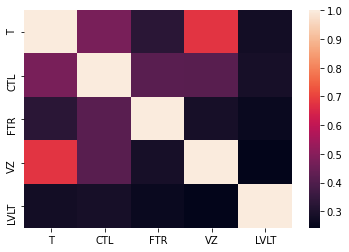

In [17]:
import seaborn as sns
sns.heatmap(sp500_px.corr())